# BSK Dataset

In [3]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
#from sklearn.pipeline import make_pipeline
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
dftraining = pd.read_csv("../../datasets/ucirvine-datasets/bks/train.csv")
dftest = pd.read_csv("../../datasets/ucirvine-datasets/bks/test.csv")
dfvalidation = pd.read_csv("../../datasets/ucirvine-datasets/bks/validation.csv")

print("Training dimentions: " + str(dftraining.shape))
print("Validation dimentions: " + str(dftest.shape))
print("Test dimentions: " + str(dfvalidation.shape))

Training dimentions: (10427, 21)
Validation dimentions: (3476, 21)
Test dimentions: (3476, 21)


In [5]:
training = dftraining[:].values
validation = dfvalidation[:].values
test = dftest[:].values

In [6]:
#dftraining.head()

In [7]:
#dftraining.describe()

In [8]:
Xtrain = training[:,:-1]
Ytrain = training[:,-1]
Xtest = test[:,:-1]
Ytest = test[:,-1]
Xvalidation = validation[:,:-1]
Yvalidation = validation[:,-1]

print("Samples: " + str(Xtrain.shape))
print("Outputs: " + str(Ytrain.shape))

Samples: (10427, 20)
Outputs: (10427,)


In [85]:
train_errors, val_errors, modelos = [], [], []

for m in range(5,15):    
    mlp = MLPRegressor(hidden_layer_sizes=(10*(m+1),), activation='relu', solver='sgd', alpha=0.0001, 
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, 
                    verbose=False, warm_start=True, early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
    
    mlp.fit(Xtrain, Ytrain)
    modelos.append(mlp)
    
    y_train_predict = mlp.predict(Xtrain)
    y_val_predict = mlp.predict(Xtest)
    
    train_errors.append(mean_squared_error(y_train_predict, Ytrain))
    val_errors.append(mean_squared_error(y_val_predict, Ytest))

In [86]:
models = ['RNA{0}'.format(i) for i in range(1,len(modelos))]
arq = ['20x{0}x1'.format(i) for i in range(50,10*len(modelos),10)]

s = pd.DataFrame([models, arq, train_errors, val_errors], index=['modelo', 'arquitectura', 'entrenamiento', 'validacion'])

In [87]:
s.T

,modelo,arquitectura,entrenamiento,validacion
0,RNA1,20x50x1,0.00149844,0.00166228
1,RNA2,20x60x1,0.00161756,0.00169721
2,RNA3,20x70x1,0.0012243,0.00123943
3,RNA4,20x80x1,0.00122177,0.00122133
4,RNA5,20x90x1,0.00113196,0.00120611
5,RNA6,None,0.0011195,0.00116116
6,RNA7,None,0.0012028,0.00119847
7,RNA8,None,0.0010958,0.00113911
8,RNA9,None,0.00116132,0.00116133
9,NaN,NaN,0.001189,0.00118727


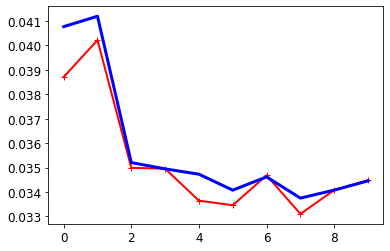

In [88]:
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [89]:
print(models[val_errors.index(min(val_errors))])
print(modelos[val_errors.index(min(val_errors))])

RNA8
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(130,), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=True)


In [90]:
predict = mlp.predict(Xvalidation)
predict

array([0.15545033, 0.17964112, 0.30170263, ..., 0.82946425, 0.04618346,
       0.42134968])

In [91]:
mean_squared_error(predict, Yvalidation)

0.0012173897049959483

In [92]:
predict[1:10]

array([ 0.17964112,  0.30170263,  0.12216385,  0.30569444,  0.02386816,
       -0.02626241,  0.18478572,  0.02637954,  0.22713176])

In [93]:
Yvalidation[1:10]

array([0.20600414, 0.38819876, 0.11076605, 0.32298137, 0.06418219,
       0.0310559 , 0.18012422, 0.01035197, 0.2184265 ])